# 11.2. 凸性
**凸性**（convexity）在优化算法的设计中起到至关重要的作用，这主要是由于在这种情况下对算法进行分析和测试要容易得多。换言之，如果该算法甚至在凸性条件设定下的效果很差，通常我们很难在其他条件下看到好的结果。

此外，即使深度学习中的优化问题通常是非凸的，它们也经常在局部极小值附近表现出一些凸性。这可能会产生一些像`Izmailov.Podoprikhin.Garipov.ea.2018`这样比较有意思的新的优化变体。

## 11.2.1. 定义
在进行凸分析之前，我们需要定义**凸集**（convex sets）和**凸函数**（convex functions）。

### 凸集
**凸集**（convex set）是凸性的基础。简单地说，如果对于任何$a，b \in \mathcal{X}$，连接$a$和$b$的线段也位于$\mathcal{X}$中，则向量空间中的一个集合$\mathcal{X}$是**凸**（convex）的。在数学术语上，这意味着对于所有$\lambda \in [0, 1]$，我们得到

$$\lambda  a + (1-\lambda)  b \in \mathcal{X} \text{ 当 } a, b \in \mathcal{X}. \tag{11.2.1}$$


![avatar](../img/11_1.png)
![avatar](../img/11_2.png)
![avatar](../img/11_3.png)


### 凸函数

现在我们有了凸集，我们可以引入**凸函数**（convex function）$f$。
给定一个凸集$\mathcal{X}$，如果对于所有$x, x' \in \mathcal{X}$和所有$\lambda \in [0, 1]$，一个函数$f: \mathcal{X} \to \mathbb{R}$是凸的，我们可以得到

$$\lambda f(x) + (1-\lambda) f(x') \geq f(\lambda x + (1-\lambda) x'). \tag{11.2.2}$$

为了说明这一点，让我们绘制一些函数并检查哪些函数满足要求。下面我们定义一些函数，包括凸函数和非凸函数。

不出所料，余弦函数为非凸的，而抛物线函数和指数函数为凸的。请注意，为使该条件有意义，$\mathcal{X}$是凸集的要求是必要的。否则可能无法很好地界定$f(\lambda x + (1-\lambda) x')$的结果。


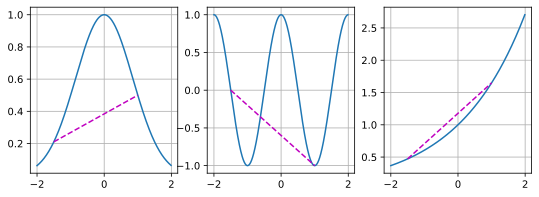

In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

f=lambda x:0.5**x**2 # 凸函数
g=lambda x:torch.cos(np.pi *x )  # 非凸函数
h=lambda x:torch.exp(0.5*x) # 凸函数

x,segment=torch.arange(-2,2,0.01),torch.tensor([-1.5,1])
d2l.use_svg_display()
_,axes=d2l.plt.subplots(1,3,figsize=(9,3))

for ax,func in zip(axes,[f,g,h]):
    d2l.plot([x,segment],[func(x),func(segment)],axes=ax)

### 詹森不等式
给定一个凸函数$f$，最有用的数学工具之一就是**詹森不等式**（Jensen's inequality）。
它是凸性定义的一种推广：

$$\sum_i \alpha_i f(x_i)  \geq f\left(\sum_i \alpha_i x_i\right) \text{ and } E_X[f(X)] \geq f\left(E_X[X]\right), \tag{11.2.3}$$

其中$\alpha_i$是满足$\sum_i \alpha_i = 1$的非负实数，$X$是随机变量。换句话说，凸函数的期望不小于期望的凸函数，其中后者通常是一个更简单的表达式。为了证明第一个不等式，我们多次将凸性的定义应用于一次求和中的一项。

詹森不等式的一个常见应用：**用一个较简单的表达式约束一个较复杂的表达式**。例如，它可以应用于部分观察到的随机变量的对数似然。具体地说，由于$\int P(Y) P(X \mid Y) dY = P(X)$，所以

$$E_{Y \sim P(Y)}[-\log P(X \mid Y)] \geq -\log P(X), \tag{11.2.4}$$

这里，$Y$是典型的未观察到的随机变量，$P(Y)$是它可能如何分布的最佳猜测，$P(X)$是将$Y$积分后的分布。例如，在聚类中$Y$可能是簇标签，而在应用簇标签时，$P(X \mid Y)$是生成模型。

## 11.2.2. 性质
### 局部极小值是全局极小值
首先凸函数的局部极小值也是全局极小值。下面我们用反证法给出证明。

假设$x^{\ast} \in \mathcal{X}$是一个局部最小值，则存在一个很小的正值$p$，使得当$x \in \mathcal{X}$满足$0 < |x - x^{\ast}| \leq p$时，有$f(x^{\ast}) < f(x)$。现在假设局部极小值$x^{\ast}$不是$f$的全局极小值：存在$x' \in \mathcal{X}$使得$f(x') < f(x^{\ast})$。则存在$\lambda \in [0, 1)$，比如$\lambda = 1 - \frac{p}{|x^{\ast} - x'|}$，使得$0 < |\lambda x^{\ast} + (1-\lambda) x' - x^{\ast}| \leq p$。

然而，根据凸性的性质，有

$$\begin{aligned}
    f(\lambda x^{\ast} + (1-\lambda) x') &\leq \lambda f(x^{\ast}) + (1-\lambda) f(x')&< \lambda f(x^{\ast}) + (1-\lambda) f(x^{\ast})&= f(x^{\ast}),
\end{aligned} \tag{11.2.5}$$

这与$x^{\ast}$是局部最小值相矛盾。因此，不存在$x' \in \mathcal{X}$满足$f(x') < f(x^{\ast})$。综上所述，局部最小值$x^{\ast}$也是全局最小值。

例如，对于凸函数$f(x) = (x-1)^2$，有一个局部最小值$x=1$，它也是全局最小值。

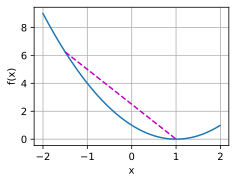

In [2]:
f=lambda x:(x-1) **2
d2l.set_figsize()
d2l.plot([x,segment],[f(x),f(segment)],'x','f(x)')

凸函数的局部极小值同时也是全局极小值这一性质是很方便的。这意味着如果我们最小化函数，我们就不会“卡住”。但是，请注意，这并不意味着不能有多个全局最小值，或者可能不存在一个全局最小值。例如，函数$f(x) = \mathrm{max}(|x|-1, 0)$在$[-1,1]$区间上都是最小值。相反，函数$f(x) = \exp(x)$在$\mathbb{R}$上没有取得最小值。对于$x \to -\infty$，它趋近于$0$，但是没有$f(x) = 0$的$x$。

### 凸函数的下水平集是凸的

我们可以方便地通过凸函数的*下水平集*（below sets）定义凸集。具体来说，给定一个定义在凸集$\mathcal{X}$上的凸函数$f$，其任意一个下水平集

$$\mathcal{S}_b := \{x | x \in \mathcal{X} \text{ and } f(x) \leq b\} \tag{11.2.6}$$

是凸的。

让我们快速证明一下。对于任何$x, x' \in \mathcal{S}_b$，我们需要证明：当$\lambda \in [0, 1]$时，$\lambda x + (1-\lambda) x' \in \mathcal{S}_b$。因为$f(x) \leq b$且$f(x') \leq b$，所以

$$f(\lambda x + (1-\lambda) x') \leq \lambda f(x) + (1-\lambda) f(x') \leq b. \tag{11.2.7}$$

### 凸性和二阶导数

当一个函数的二阶导数$f: \mathbb{R}^n \rightarrow \mathbb{R}$存在时，我们很容易检查这个函数的凸性。我们需要做的就是检查$\nabla^2f \succeq 0$，即对于所有$\mathbf{x} \in \mathbb{R}^n$，$\mathbf{x}^\top \mathbf{H} \mathbf{x} \geq 0$.例如，函数$f(\mathbf{x}) = \frac{1}{2} \|\mathbf{x}\|^2$是凸的，因为$\nabla^2 f = \mathbf{1}$，即其导数是单位矩阵。


更正式地讲，$f$为凸函数，当且仅当任意二次可微一维函数$f: \mathbb{R}^n \rightarrow \mathbb{R}$是凸的。对于任意二次可微多维函数$f: \mathbb{R}^{n} \rightarrow \mathbb{R}$，它是凸的当且仅当它的Hessian$\nabla^2f\succeq 0$。

首先，我们来证明一下一维情况。为了证明凸函数的$f''(x) \geq 0$，我们使用：

$$\frac{1}{2} f(x + \epsilon) + \frac{1}{2} f(x - \epsilon) \geq f\left(\frac{x + \epsilon}{2} + \frac{x - \epsilon}{2}\right) = f(x). \tag{11.2.8}$$

因为二阶导数是由有限差分的极限给出的，所以遵循

$$f''(x) = \lim_{\epsilon \to 0} \frac{f(x+\epsilon) + f(x - \epsilon) - 2f(x)}{\epsilon^2} \geq 0.\tag{11.2.9}$$

为了证明$f'' \geq 0$可以推导$f$是凸的，我们使用这样一个事实：$f'' \geq 0$意味着$f'$是一个单调的非递减函数。假设$a < x < b$是$\mathbb{R}$中的三个点，其中，$x = (1-\lambda)a + \lambda b$且$\lambda \in (0, 1)$.根据中值定理，存在$\alpha \in [a, x]$，$\beta \in [x, b]$，使得

$$f'(\alpha) = \frac{f(x) - f(a)}{x-a} \text{ 且 } f'(\beta) = \frac{f(b) - f(x)}{b-x}.\tag{11.2.10}$$

通过单调性$f'(\beta) \geq f'(\alpha)$，因此

$$\frac{x-a}{b-a}f(b) + \frac{b-x}{b-a}f(a) \geq f(x).\tag{11.2.11}$$

由于$x = (1-\lambda)a + \lambda b$，所以

$$\lambda f(b) + (1-\lambda)f(a) \geq f((1-\lambda)a + \lambda b),\tag{11.2.12}$$

从而证明了凸性。

第二，我们需要一个引理证明多维情况：$f: \mathbb{R}^n \rightarrow \mathbb{R}$是凸的当且仅当对于所有$\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$

$$g(z) \stackrel{\mathrm{def}}{=} f(z \mathbf{x} + (1-z)  \mathbf{y}) \text{ where } z \in [0,1] \tag{11.2.13}$$

是凸的。

为了证明$f$的凸性意味着$g$是凸的，我们可以证明，对于所有的$a，b，\lambda \in[0，1]$（这样有$0 \leq \lambda a + (1-\lambda) b \leq 1$），

![avatar](../img/11_5.png)

为了证明这一点，我们可以证明对$[0，1]$中所有的$\lambda$：

![avatar](../img/11_6.png)

最后，利用上面的引理和一维情况的结果，我们可以证明多维情况：多维函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$是凸函数，当且仅当$g(z) \stackrel{\mathrm{def}}{=} f(z \mathbf{x} + (1-z)  \mathbf{y})$是凸的，这里$z \in [0,1]$，$\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$。根据一维情况，此条成立的条件为，当且仅当对于所有$\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$，$g'' = (\mathbf{x} - \mathbf{y})^\top \mathbf{H}(\mathbf{x} - \mathbf{y}) \geq 0$（$\mathbf{H} \stackrel{\mathrm{def}}{=} \nabla^2f$）。这相当于根据半正定矩阵的定义，$\mathbf{H} \succeq 0$。

## 11.2.3. 约束

凸优化的一个很好的特性是能够让我们有效地处理**约束**（constraints）。即它使我们能够解决以下形式的**约束优化**（constrained optimization）问题：

$$\begin{aligned} \mathop{\mathrm{minimize~}}_{\mathbf{x}} & f(\mathbf{x}) \\
    \text{ subject to } & c_i(\mathbf{x}) \leq 0 \text{ for all } i \in \{1, \ldots, N\}.
\end{aligned}  \tag{11.2.16}$$

这里$f$是目标函数，$c_i$是约束函数。例如第一个约束$c_1(\mathbf{x}) = \|\mathbf{x}\|_2 - 1$，则参数$\mathbf{x}$被限制为单位球。如果第二个约束$c_2(\mathbf{x}) = \mathbf{v}^\top \mathbf{x} + b$，那么这对应于半空间上所有的$\mathbf{x}$。同时满足这两个约束等于选择一个球的切片作为约束集。

### 拉格朗日函数

通常，求解一个有约束的优化问题是困难的，解决这个问题的一种方法来自物理中相当简单的直觉。想象一个球在一个盒子里，球会滚到最低的地方，重力将与盒子两侧对球施加的力平衡。简而言之，目标函数（即重力）的梯度将被约束函数的梯度所抵消（由于墙壁的“推回”作用，需要保持在盒子内）。请注意，任何不起作用的约束（即球不接触壁）都将无法对球施加任何力。

这里我们简略拉格朗日函数$L$的推导，上述推理可以通过以下鞍点优化问题来表示：

$$L(\mathbf{x}, \alpha_1, \ldots, \alpha_n) = f(\mathbf{x}) + \sum_{i=1}^n \alpha_i c_i(\mathbf{x}) \text{ where } \alpha_i \geq 0.\tag{11.2.17}$$

这里的变量$\alpha_i$（$i=1,\ldots,n$）是所谓的*拉格朗日乘数*（Lagrange multipliers），它确保约束被正确地执行。选择它们的大小足以确保所有$i$的$c_i(\mathbf{x}) \leq 0$。例如，对于$c_i(\mathbf{x}) < 0$中任意$\mathbf{x}$，我们最终会选择$\alpha_i = 0$。此外，这是一个*鞍点*（saddlepoint）优化问题。在这个问题中，我们想要使$L$相对于$\alpha_i$*最大化*（maximize），同时使它相对于$\mathbf{x}$*最小化*（minimize）。有大量的文献解释如何得出函数$L(\mathbf{x}, \alpha_1, \ldots, \alpha_n)$。我们这里只需要知道$L$的鞍点是原始约束优化问题的最优解就足够了。

### 惩罚

一种至少近似地满足约束优化问题的方法是采用拉格朗日函数$L$。除了满足$c_i(\mathbf{x}) \leq 0$之外，我们只需将$\alpha_i c_i(\mathbf{x})$添加到目标函数$f(x)$。这样可以确保不会严重违反约束。

事实上，我们一直在使用这个技巧。比如权重衰减4.5节，在目标函数中加入$\frac{\lambda}{2} |\mathbf{w}|^2$，以确保$\mathbf{w}$不会增长太大。使用约束优化的观点，我们可以看到，对于若干半径$r$，这将确保$|\mathbf{w}|^2 - r^2 \leq 0$。通过调整$\lambda$的值，我们可以改变$\mathbf{w}$的大小。

通常，添加惩罚是确保近似满足约束的一种好方法。在实践中，这被证明比精确的满意度更可靠。此外，对于非凸问题，许多使精确方法在凸情况下的性质（例如，可求最优解）不再成立。

### 投影

满足约束条件的另一种策略是**投影**（projections）。同样，我们之前也遇到过，例如在8.5节中处理梯度截断时，我们通过

$$\mathbf{g} \leftarrow \mathbf{g} \cdot \mathrm{min}(1, \theta/\|\mathbf{g}\|), \tag{11.2.18}$$

确保梯度的长度以$\theta$为界限。这就是$\mathbf{g}$在半径为$\theta$的球上的*投影*（projection）。更泛化地说，在凸集$\mathcal{X}$上的投影被定义为

$$\mathrm{Proj}_\mathcal{X}(\mathbf{x}) = \mathop{\mathrm{argmin}}_{\mathbf{x}' \in \mathcal{X}} \|\mathbf{x} - \mathbf{x}'\|. \tag{11.2.19}$$

它是$\mathcal{X}$中离$\mathbf{X}$最近的点。

![avatar](../img/11_4.png)

投影的数学定义听起来可能有点抽象，为了解释得更清楚一些，请看上图。图中有两个凸集，一个圆和一个菱形。两个集合内的点（黄色）在投影期间保持不变。两个集合（黑色）之外的点投影到集合中接近原始点（黑色）的点（红色）。虽然对于$L_2$的球面来说，方向保持不变，但一般情况下不需要这样。

凸投影的一个用途是计算稀疏权重向量。在本例中，我们将权重向量投影到一个$L_1$的球上，这是上图中菱形例子的一个广义版本。

## 11.2.4. 小结

在深度学习的背景下，凸函数的主要目的是帮助我们详细了解优化算法。
我们由此得出梯度下降法和随机梯度下降法是如何相应推导出来的。

* 凸集的交点是凸的，并集不是。
* 根据詹森不等式，“一个多变量凸函数的总期望值”大于或等于“用每个变量的期望值计算这个函数的总值“。
* 一个二次可微函数是凸函数，当且仅当其Hessian（二阶导数矩阵）是半正定的。
* 凸约束可以通过拉格朗日函数来添加。在实践中，只需在目标函数中加上一个惩罚就可以了。
* 投影映射到凸集中最接近原始点的点。